In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore,skew,normaltest

#  Data Exploration

In [3]:
# loading dataset
df=pd.read_csv('Employee.csv')

In [3]:
df

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  140 non-null    object 
 1   Age      130 non-null    float64
 2   Salary   124 non-null    float64
 3   Place    134 non-null    object 
 4   Country  148 non-null    object 
 5   Gender   148 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.1+ KB


In [7]:
df.shape

(148, 6)

In [11]:
df.isnull().sum()

Company     8
Age        18
Salary     24
Place      14
Country     0
Gender      0
dtype: int64

In [17]:
df.Gender.unique()

array([0, 1], dtype=int64)

In [19]:
df.Gender.nunique()

2

In [5]:
df.drop('Gender',axis=1,inplace=True)

In [7]:
df.head()

,Company,Age,Salary,Place,Country
0,TCS,20.0,NaN,Chennai,India
1,Infosys,30.0,NaN,Mumbai,India
2,TCS,35.0,2300.0,Calcutta,India
3,Infosys,40.0,3000.0,Delhi,India
4,TCS,23.0,4000.0,Mumbai,India


In [11]:
df.isnull().sum()

Company     8
Age        18
Salary     24
Place      14
Country     0
dtype: int64

# Data Cleaning

In [13]:
df.duplicated().sum()

8

In [9]:
df=df.drop_duplicates()

In [11]:
df.shape

(140, 5)

In [21]:
df

,Company,Age,Salary,Place,Country
0,TCS,20.0,NaN,Chennai,India
1,Infosys,30.0,NaN,Mumbai,India
2,TCS,35.0,2300.0,Calcutta,India
3,Infosys,40.0,3000.0,Delhi,India
4,TCS,23.0,4000.0,Mumbai,India
...,...,...,...,...,...
139,Congnizant,22.0,2934.0,Noida,India
140,Infosys,44.0,4034.0,Hyderabad,India
141,TCS,33.0,5034.0,Calcutta,India
142,Infosys Pvt Lmt,22.0,8202.0,Mumbai,India


In [13]:
# replacing o with Nan in age column
df['Age'].fillna(0,inplace=True)

C:\Users\thask\AppData\Local\Temp\ipykernel_16880\1811419310.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(0,inplace=True)


In [15]:
df.head(20)

,Company,Age,Salary,Place,Country
0,TCS,20.0,NaN,Chennai,India
1,Infosys,30.0,NaN,Mumbai,India
2,TCS,35.0,2300.0,Calcutta,India
3,Infosys,40.0,3000.0,Delhi,India
4,TCS,23.0,4000.0,Mumbai,India
5,Infosys,0.0,5000.0,Calcutta,India
6,TCS,0.0,6000.0,Chennai,India
7,Infosys,23.0,7000.0,Mumbai,India
8,TCS,34.0,8000.0,Calcutta,India
9,CTS,45.0,9000.0,Delhi,India


In [61]:
df.isnull().sum()

Company     8
Age         0
Salary     23
Place      14
Country     0
dtype: int64

In [17]:
df['Company']=df['Company'].fillna(df['Company'].mode()[0])

In [29]:
df.isnull().sum()

Company     0
Age         0
Salary     23
Place      14
Country     0
dtype: int64

In [19]:
df.head(50)

,Company,Age,Salary,Place,Country
0,TCS,20.0,NaN,Chennai,India
1,Infosys,30.0,NaN,Mumbai,India
2,TCS,35.0,2300.0,Calcutta,India
3,Infosys,40.0,3000.0,Delhi,India
4,TCS,23.0,4000.0,Mumbai,India
5,Infosys,0.0,5000.0,Calcutta,India
6,TCS,0.0,6000.0,Chennai,India
7,Infosys,23.0,7000.0,Mumbai,India
8,TCS,34.0,8000.0,Calcutta,India
9,CTS,45.0,9000.0,Delhi,India


In [33]:
df.isnull().sum()

Company     0
Age         0
Salary     23
Place      14
Country     0
dtype: int64

In [21]:
df['Salary'].fillna(df['Salary'].median(),inplace=True)

C:\Users\thask\AppData\Local\Temp\ipykernel_16880\4068266293.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Salary'].fillna(df['Salary'].median(),inplace=True)


In [23]:
df.head()

,Company,Age,Salary,Place,Country
0,TCS,20.0,5000.0,Chennai,India
1,Infosys,30.0,5000.0,Mumbai,India
2,TCS,35.0,2300.0,Calcutta,India
3,Infosys,40.0,3000.0,Delhi,India
4,TCS,23.0,4000.0,Mumbai,India


In [43]:
df.describe()

,Age,Salary
count,140.000000,140.000000
mean,26.828571,5241.393162
std,14.483900,2368.066485
min,0.000000,1089.000000
25%,21.000000,3045.000000
50%,31.000000,5241.393162
75%,36.000000,7084.000000
max,54.000000,9876.000000


In [45]:
df.isnull().sum()

Company     0
Age         0
Salary      0
Place      14
Country     0
dtype: int64

In [25]:
df['Place']=df['Place'].fillna(df['Place'].mode()[0])

In [27]:
df.head(40)

,Company,Age,Salary,Place,Country
0,TCS,20.0,5000.0,Chennai,India
1,Infosys,30.0,5000.0,Mumbai,India
2,TCS,35.0,2300.0,Calcutta,India
3,Infosys,40.0,3000.0,Delhi,India
4,TCS,23.0,4000.0,Mumbai,India
5,Infosys,0.0,5000.0,Calcutta,India
6,TCS,0.0,6000.0,Chennai,India
7,Infosys,23.0,7000.0,Mumbai,India
8,TCS,34.0,8000.0,Calcutta,India
9,CTS,45.0,9000.0,Delhi,India


In [29]:
df.isnull().sum()

Company    0
Age        0
Salary     0
Place      0
Country    0
dtype: int64

# Data A nalysis

In [33]:
filtered_df=df[(df['Age']>40) & (df['Salary']<5000.00)]

In [37]:
filtered_df.shape

(14, 5)

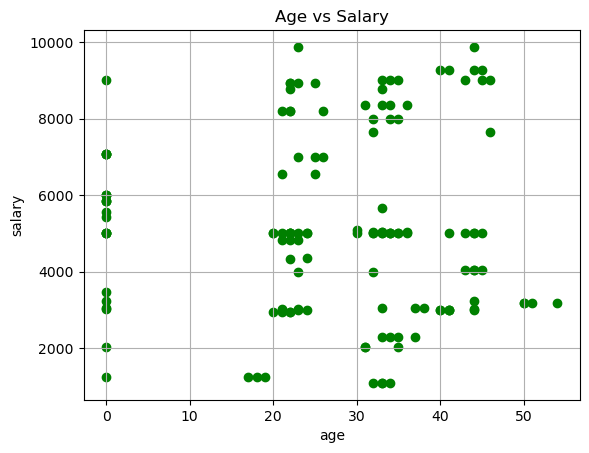

In [43]:
plt.scatter(df['Age'],df['Salary'],color='green')
plt.title('Age vs Salary')
plt.xlabel('age')
plt.ylabel('salary')
plt.grid(True)
plt.show()

In [45]:
place_counts=df['Place'].value_counts()

In [47]:
place_counts

Place
Mumbai        47
Calcutta      31
Chennai       14
Delhi         13
Cochin        12
Noida          8
Hyderabad      8
Podicherry     3
Pune           2
Bhopal         1
Nagpur         1
Name: count, dtype: int64

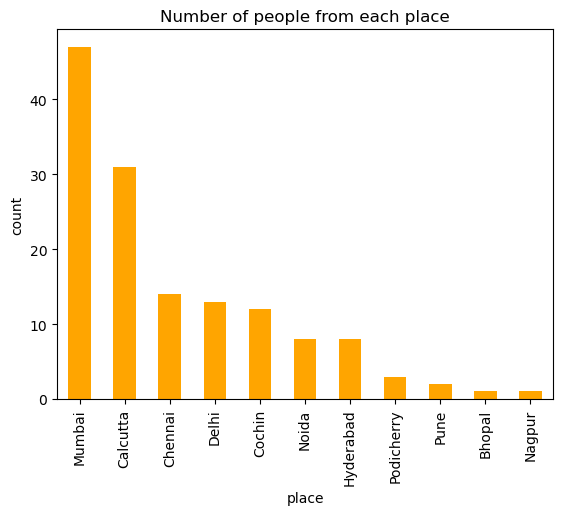

In [49]:
place_counts.plot(kind='bar',color='orange')
plt.title('Number of people from each place')
plt.xlabel('place')
plt.ylabel('count')
plt.show()

# Data Encoding

In [53]:
df_encoded=pd.get_dummies(df,columns=['Company','Place','Country'])
df_encoded

,Age,Salary,Company_CTS,Company_Congnizant,Company_Infosys,Company_Infosys Pvt Lmt,Company_TCS,Company_Tata Consultancy Services,Place_Bhopal,Place_Calcutta,Place_Chennai,Place_Cochin,Place_Delhi,Place_Hyderabad,Place_Mumbai,Place_Nagpur,Place_Noida,Place_Podicherry,Place_Pune,Country_India
0,20.0,5000.0,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True
1,30.0,5000.0,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True
2,35.0,2300.0,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,True
3,40.0,3000.0,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True
4,23.0,4000.0,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,22.0,2934.0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True
140,44.0,4034.0,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True
141,33.0,5034.0,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,True
142,22.0,8202.0,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True


In [59]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

standard_scaler = StandardScaler()
df_standard_scaled = df.copy()
df_standard_scaled[numerical_cols] = standard_scaler.fit_transform(df_standard_scaled[numerical_cols])

print("Standard Scaled Data:")
print(df_standard_scaled.head())

minmax_scaler = MinMaxScaler()
df_minmax_scaled = df.copy()
df_minmax_scaled[numerical_cols] = minmax_scaler.fit_transform(df_minmax_scaled[numerical_cols])
print("\nMin-Max Scaled Data:")
print(df_minmax_scaled.head())

Standard Scaled Data:
   Company       Age    Salary     Place Country
0      TCS -0.473152 -0.085435   Chennai   India
1  Infosys  0.219749 -0.085435    Mumbai   India
2      TCS  0.566199 -1.228878  Calcutta   India
3  Infosys  0.912649 -0.932430     Delhi   India
4      TCS -0.265282 -0.508932    Mumbai   India

Min-Max Scaled Data:
   Company       Age    Salary     Place Country
0      TCS  0.370370  0.445089   Chennai   India
1  Infosys  0.555556  0.445089    Mumbai   India
2      TCS  0.648148  0.137817  Calcutta   India
3  Infosys  0.740741  0.217480     Delhi   India
4      TCS  0.425926  0.331285    Mumbai   India
